# iperf3によるVM間の転送性能テスト

### 同一のNSX論理スイッチに接続する4つのVM間でTCPスループットを計測(60秒)

Testing, wait 60 seconds...  done
/root/mytesttools/tester/jupyter/reports/DLS4-iperf3-180320-220946/DLS4-cl-172.16.130.202.json


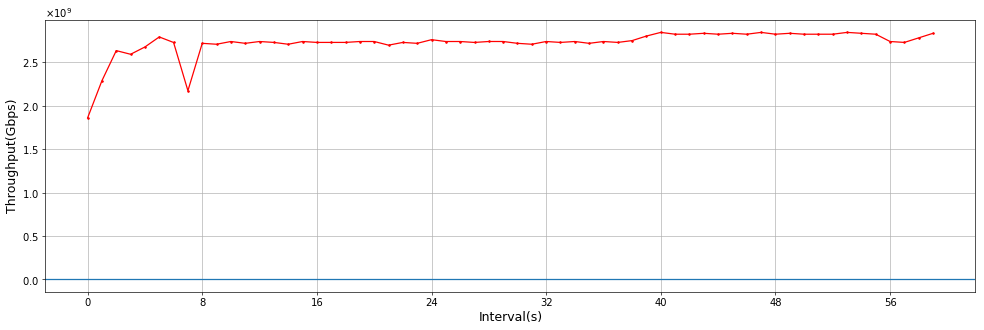

/root/mytesttools/tester/jupyter/reports/DLS4-iperf3-180320-220946/DLS4-cl-172.16.130.201.json


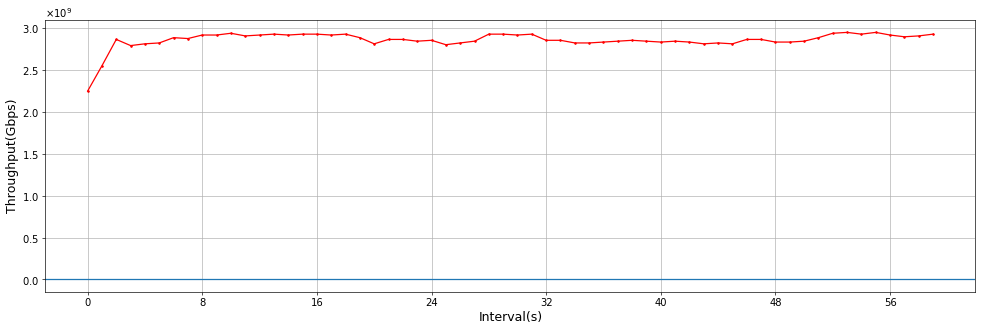

/root/mytesttools/tester/jupyter/reports/DLS4-iperf3-180320-220946/DLS4-cl-172.16.130.204.json


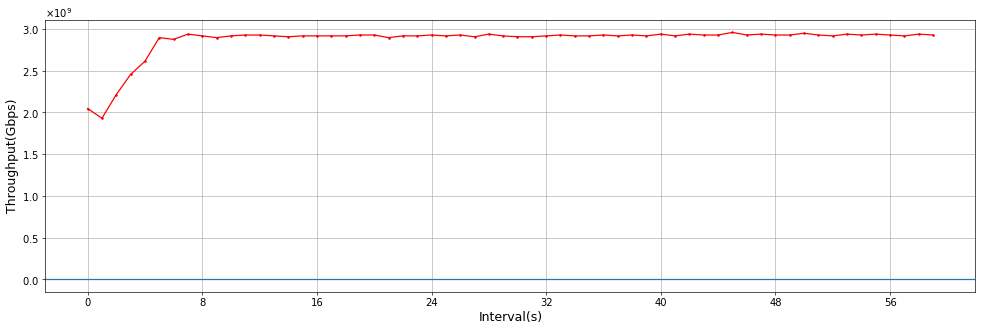

/root/mytesttools/tester/jupyter/reports/DLS4-iperf3-180320-220946/DLS4-cl-172.16.130.203.json


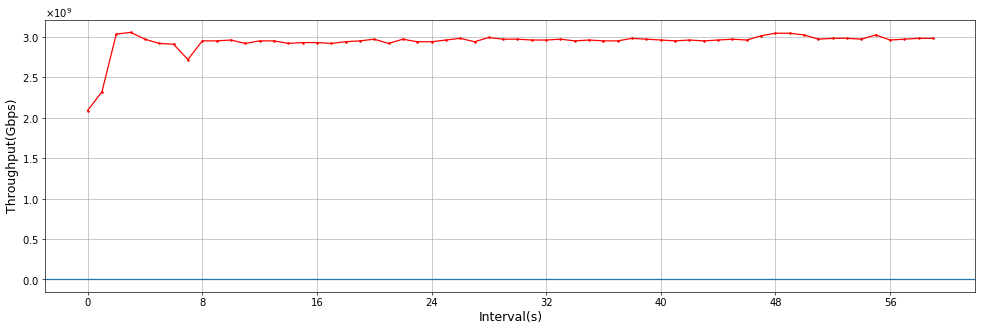

In [20]:
%run -i iperf3_peer.py -C DLS4-config -N DLS4 -t 60

### NSX ESGを介した4つのVM間でTCPスループットを計測(60秒)

Testing, wait 60 seconds...  done
/root/mytesttools/tester/jupyter/reports/ESG4-iperf3-180319-191142/ESG4-cl-172.16.130.203.json


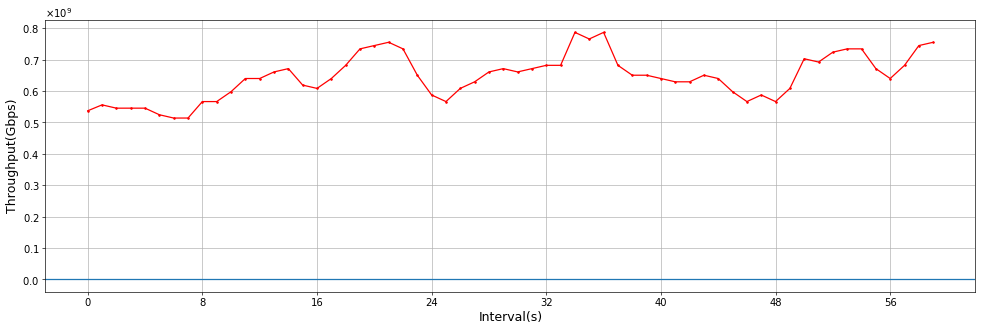

/root/mytesttools/tester/jupyter/reports/ESG4-iperf3-180319-191142/ESG4-cl-172.16.130.204.json


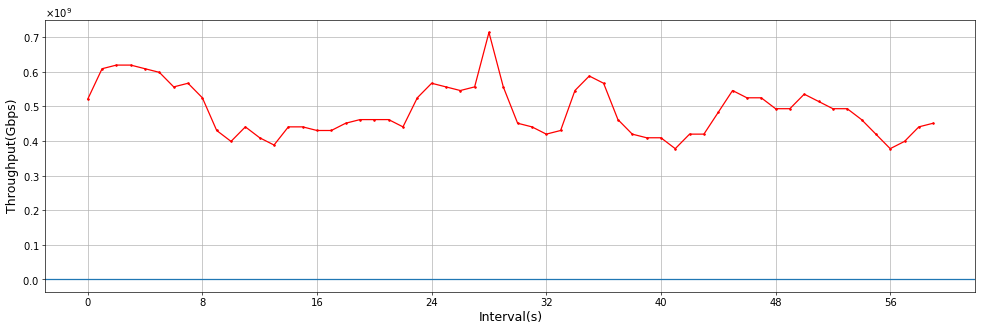

/root/mytesttools/tester/jupyter/reports/ESG4-iperf3-180319-191142/ESG4-cl-172.16.130.201.json


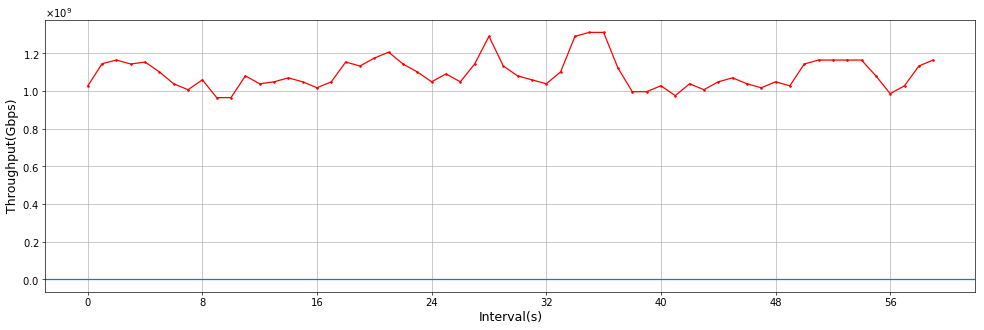

/root/mytesttools/tester/jupyter/reports/ESG4-iperf3-180319-191142/ESG4-cl-172.16.130.202.json


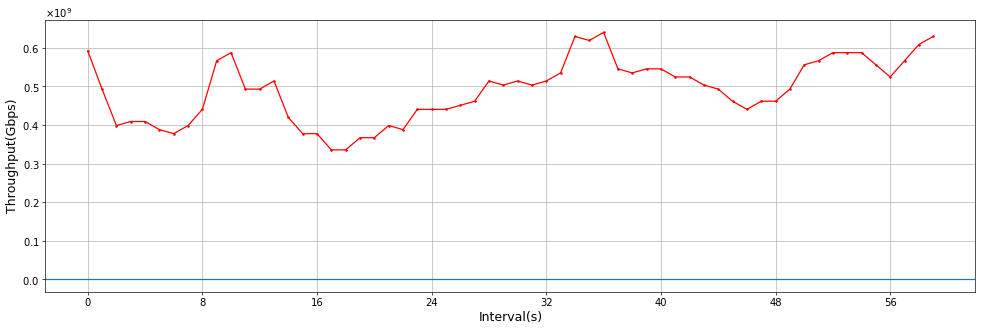

In [18]:
%run -i iperf3_peer.py -C ESG4-config -N ESG4 -t 60

Testing, wait 180 seconds...  done
/root/mytesttools/tester/jupyter/reports/ESG4-iperf3-180319-190352/ESG4-cl-172.16.130.203.json


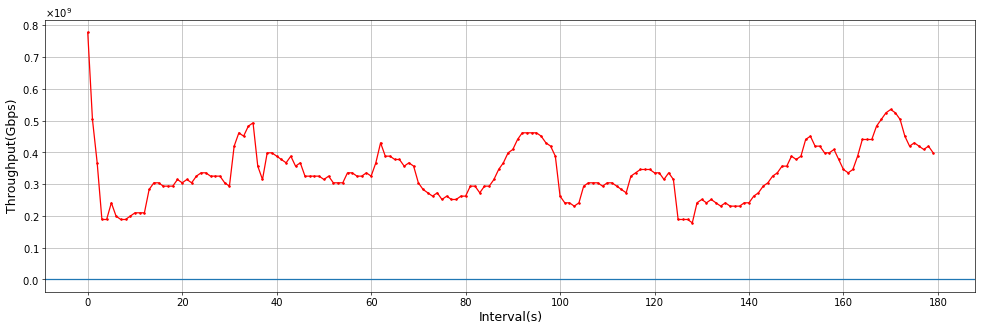

/root/mytesttools/tester/jupyter/reports/ESG4-iperf3-180319-190352/ESG4-cl-172.16.130.204.json


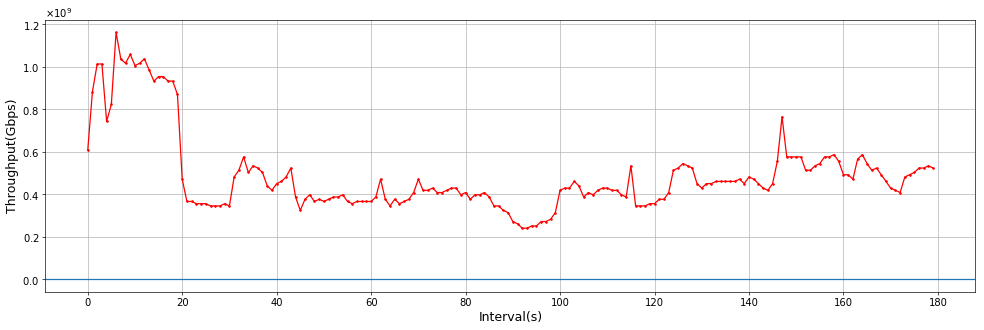

/root/mytesttools/tester/jupyter/reports/ESG4-iperf3-180319-190352/ESG4-cl-172.16.130.201.json


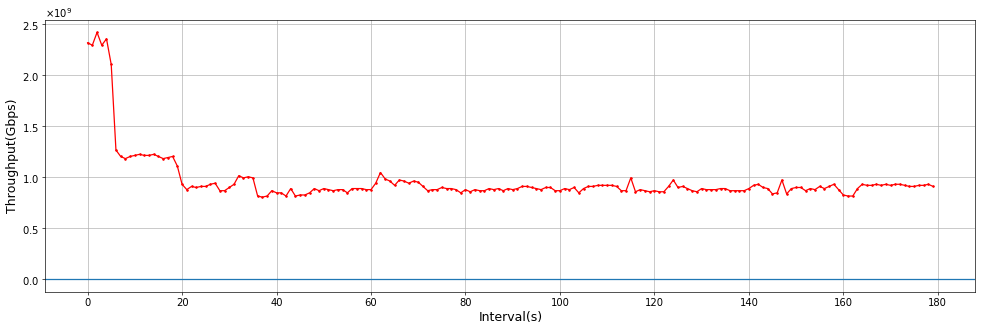

/root/mytesttools/tester/jupyter/reports/ESG4-iperf3-180319-190352/ESG4-cl-172.16.130.202.json


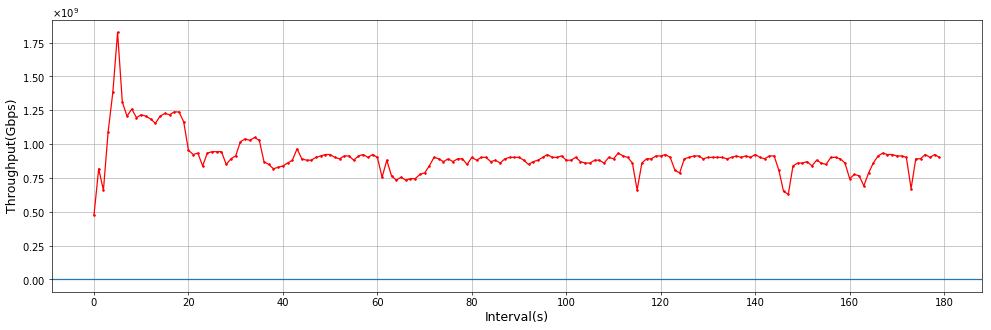

In [16]:
%run -i iperf3_peer.py -C ESG4-config -N ESG4 -t 180

In [11]:
!../scripts/servers_status.bash -C ESG4-config

Check server status on VMs...
172.16.130.201 status:
    not running
172.16.130.202 status:
    not running
172.16.130.203 status:
    not running
172.16.130.204 status:
    not running
Finished.
